<img src="imgs/dh_logo.png" align="right" width="50%">

# Introdução

Fala galera! Tudo bem? Nas próximas duas aulas, nosso foco será em um dos problemas mais tradicionais de machine learning: clustering! Muitas vezes, ao adquirir nossos dados, precisamos deles classificados para realizar nossas análises. Porém, é possível que os dados que você esteja tratando não carreguem labels de agrupamento :( Nesse caso, o que fazemos? É claro que existe a solução trivial de deixar um estagiário fazendo esse trabalho de labelling (brincadeira, não façam isso haha). Para esse problema, podemos utilizar algoritmos de clustering que, de modo não-supervisionado, conseguem identificar padrões no nosso dataset e separá-lo em grupos.

# Dica de hoje - Debugging e StackOverflow

Reparei esses dias ao observar o grupo de whatsapp de vocês que há muitas dúvidas de funcionamento e código. Precisamos nos tornar cada vez mais independentes para resolver bugs nos nossos códigos, pois isso é natural no nosso dia-a-dia. Algumas dicas que separei:
 - Leia o bug. Sério. - Um bug é lido de baixo para cima. Boas linguagens e pacotes possuem ótimos prints de bugs, e podem te nortear para resolver o problema.
 - Quando quiser usar a comunidade, literalmente copie o último print do bug e coloque na sua barra de busca. Não recomendo perguntar "no meu pc deu isso, aconteceu x", não, bugs são técnicos e nós lemos eles de maneira técnica.
 - Use o StackOverflow. Há até um guia __[aqui](https://medium.freecodecamp.org/5-steps-to-become-a-better-stack-overflow-user-4ce85711c0f9)__ e __[aqui](https://stackoverflow.com/help/how-to-ask)__.


# [Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)

Cada algoritmo de agrupamento vem em duas variantes: uma classe, que implementa o método __fit__ de ajuste para aprender os agrupamentos em dados de treinamento e uma função que, dados dados de treinamento, retorna uma matriz de rótulos de inteiros correspondentes aos diferentes agrupamentos. Para a turma, os rótulos nos dados de treinamento podem ser encontrados no atributo labels_.

## Dados de entrada

Uma coisa importante a notar é que os algoritmos implementados neste módulo podem ter diferentes tipos de matriz como entrada. Todos os métodos aceitam matrizes de dados padrão de forma: n_samples, n_features. Estes podem ser obtidos das classes no módulo sklearn.feature_extraction. Para AffinityPropagation, SpectralClustering e DBSCAN também é possível inserir matrizes de similaridade de forma n_samples, n_samples. Estes podem ser obtidos a partir das funções no módulo sklearn.metrics.pairwise.

## Métodos de Clustering

<img src="imgs/clustering.png" align="center" width="60%">

In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Clusterizando Dados Artificiais

Nessa aula, vamos começar com um exemplo mais didático e com dados gerados randomicamente pela função `make_blobs`. A ideia será gerar dados aritificiais em 3 dimensões e aplicar o K-Means para clusterizá-los. Vamos começar importando 2 módulos para plotagem e geração dos dados artificiais e preparando o nosso plot.

<img src="imgs/make_blobs.png" align="center" width="60%">

In [2]:
from mpl_toolkits.mplot3d import Axes3D

#preparando o tamanho do plot
plt.rcParams['figure.figsize'] = (20, 14)

Na célula abaixo, importe make_blobs do módulo datasets do scikit e crie X e y a partir da função `make_blobs` que importamos. Sua documentação está __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)__. Vamos começar com 800 samples, 3 features (a dimensionalidade do nosso dataset) e 4 grupos.

In [3]:
# %load solutions/solution_00.py
from sklearn.datasets import make_blobs

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

In [4]:
X.shape

(800, 3)

Agora vamos plotar os dados gerados:

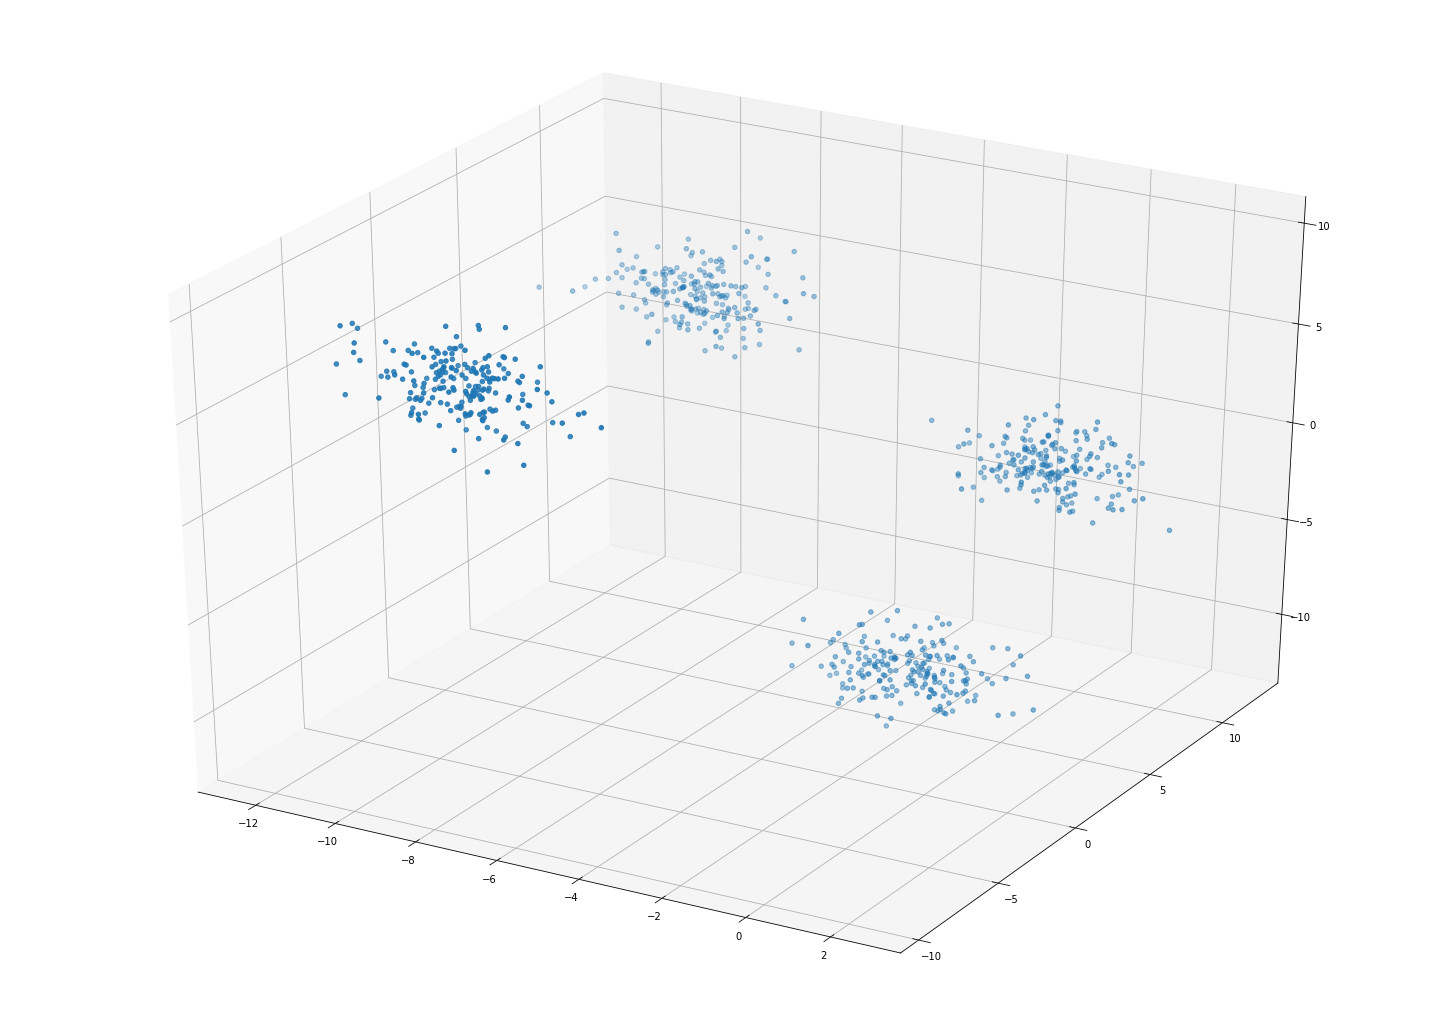

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

# Definindo o KMeans como método de Clusterização 

Precisamos, agora, utilizar algum método para realizar a clusterização de nossos dados. Um dos algoritmos mais simples para isso é o K-Means. Ele consiste dos seguintes passos:
 - Iniciar k centroides randômicos no nosso dataset. No caso, k é um hiperparâmetro e indica quantos clusters estamos procurando
 - Calcular a distância de cada ponto em relação a cada um desses centroides. Assimilar o ponto ao cluster cujo centroide estiver mais próximo
 - Depois que todos os pontos estiverem assimilados a algum cluster, calcular o ponto médio de cada um desses k clusters (daí o nome, k-means). Esse ponto médio será o novo centroide.
 - Repetir o processo até que a variância se estabilize
 
 [documentação oficial do KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Você pode conferir um tutorial de como o K-Means funciona __[nesse vídeo do StatQuest](https://www.youtube.com/watch?v=4b5d3muPQmA)__, __[nesse vídeo do Siraj](https://www.youtube.com/watch?v=9991JlKnFmk)__ ou __[nesses slides da Universidade de NY](https://people.csail.mit.edu/dsontag/courses/ml13/slides/lecture14.pdf)__. Na célula abaixo, implemente um k-means com 4 centroides. Lembre-se que o K-Means é um modelo de predição, não transformação, portanto nosso foco será utilizar o `.predict()`. Além disso, estamos falando se aprendizado não-supervisionado, portanto não há labels, treino ou teste, há somente a aplicação do algoritmo no dataset. Crie também um objeto C que recebe o atributo `cluster_centers_` do modelo. <br>
Dica: importar classe, instanciar modelo, fitting, predict!

In [6]:
# %load solutions/solution_01.py
from sklearn.cluster import KMeans

# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

Vamos agora visualizar se nosso algoritmo deu certo:

Cluster  1
[-0.26617086  8.5431127  -1.15341577]
Cluster  2
[-8.23247256 -7.17640268  7.15973561]
Cluster  3
[-1.3418004   2.43274328 -9.07806298]
Cluster  4
[-9.12258943  8.97944741  3.83359342]


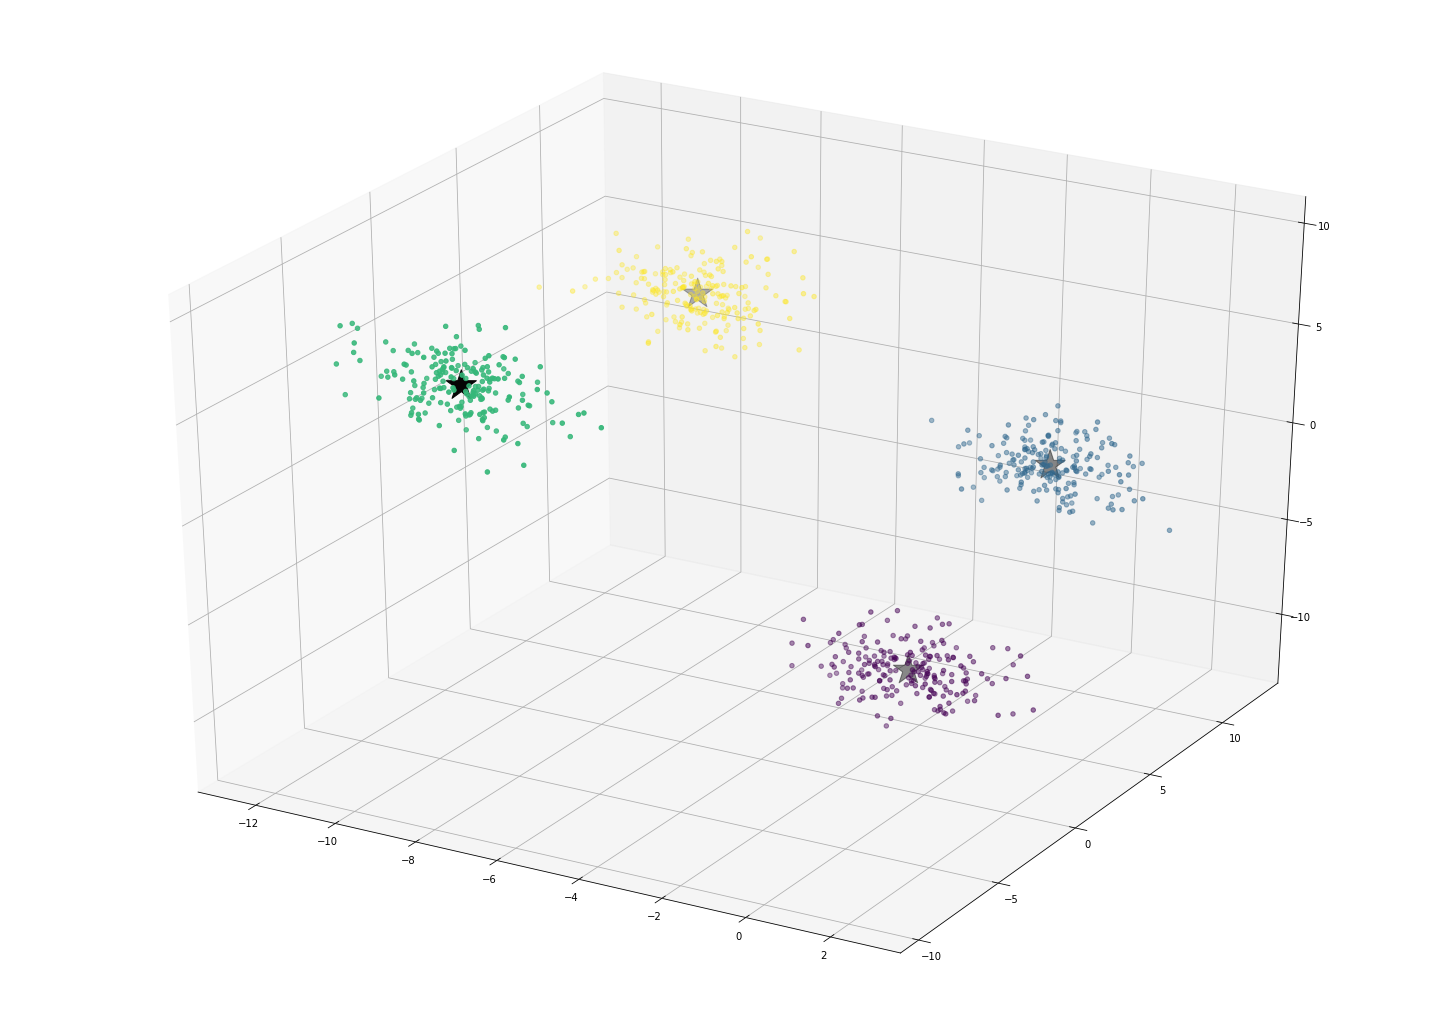

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
counter = 1
for cluster in C:
    print('Cluster ',counter)
    print(cluster)
    counter += 1

Voilà! Numa análise visual, parece que conseguimos clusterizar nossos dados não categorizados de uma forma viável! Porém, nós demos uma "roubada": já sabíamos que existiam 4 clusters, por isso deu certo. Tente repetir o processo, mas com 2 clusters. Os resultados, ficam estranhos, certo? Para isso, utilizamos o **Método Elbow**: construímos diversos K-Means com K dentro de um range, e plotamos sua inércia-variância. Numa análise intuitiva, caso escolhemos 1 centroide, a variância será máxima, enquanto que com k = n_samples, a variância será 0. Qual é o ponto de saturação para a variância no nosso K-Means? É justamento esse ponto de inflexão, o "cotovelo", que escolheremos como hiperparâmetro do nosso modelo.

Abaixo, vamos realizar esse exercício. Vamos criar um loop `for` indo de 1 a 11, no qual dentro dele iremos instanciar e fazer o *fitting* do modelo em X, guardar e printar sua variância acessando o atributo `.inertia` do modelo. Por fim, iremos plotar o resultado e escolher um K:

1 79048.69548680852
2 34162.527999169266
3 12631.803383588272
4 2502.4406948289597
5 2331.7689218721907
6 2174.9261096723912
7 2019.084761484302
8 1916.9980696209175
9 1796.3778195086536
10 1698.4394300373706


Text(0, 0.5, 'WSS')

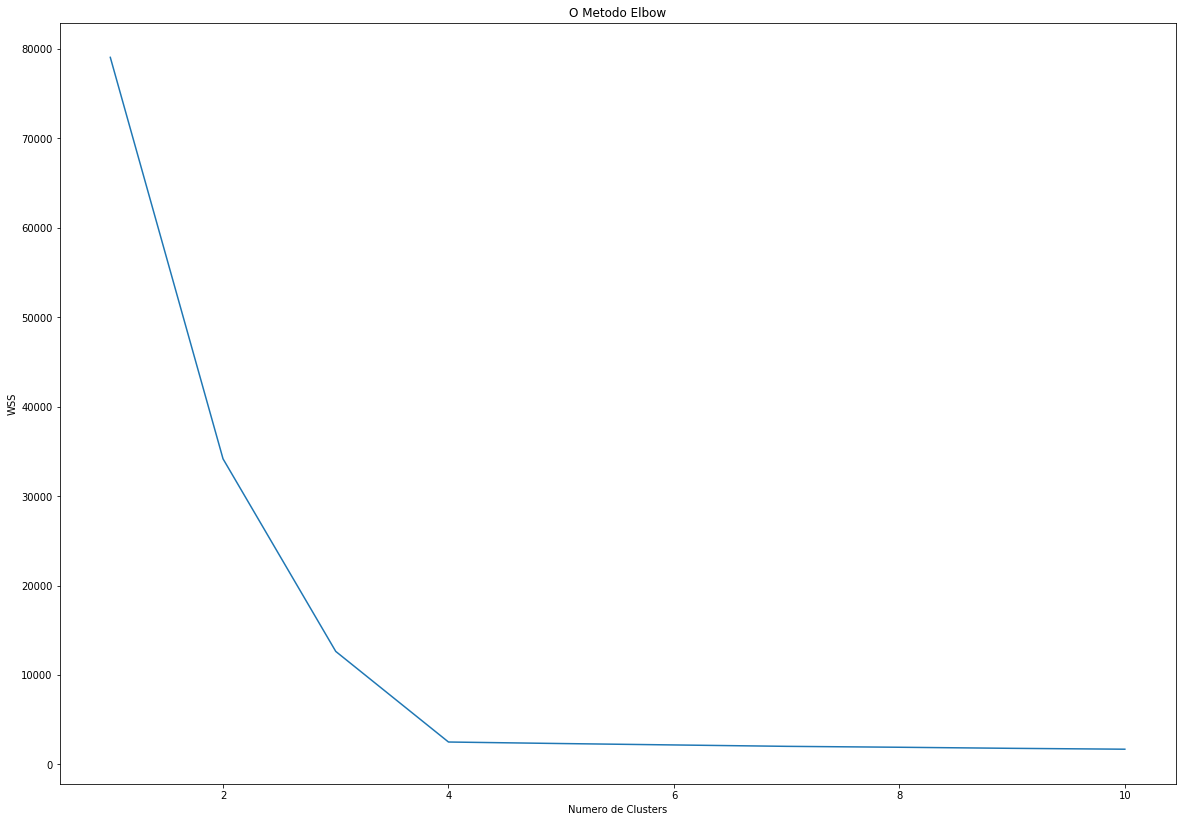

In [8]:
# %load solutions/solution_02.py
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

No exemplo acima, vemos que a saturação ocorre justamento quando K=4, portanto ele é de fato nossa melhor escolha de hiperparâmetro! Bora aplicar o K-Means num dataset mais legal.

# U.S. Household Power Consumption

<img src="imgs/uci.png" align="center" width="60%">

_Machine Learning_ tem uma ampla gama de aplicações para o setor de energia. Um muito interessante é extrair insights sobre o comportamento de consumo de eletricidade. A maneira pela qual um indivíduo ou família usa energia ao longo do dia é também conhecida como “impressão digital de energia”.

Veremos como encontrar padrões nos perfis de carga diários de uma única família com o algoritmo de clusterização K-means.

O conjunto de dados contém 2.075.259 medidas coletadas entre dezembro de 2006 e novembro de 2010 (47 meses). Você pode encontrá-lo aqui.

Vamos atacar o problema real: imagine que trabalhemos para a companhia elétrica dos EUA e queremos identificar perfis de usuários para criar produtos específicos para cada perfil. Quantos perfis temos e qual o comportamento de uso de energia diário deles? Para essas situações, é interessante usar métodos de clustering para responder essas perguntas!

Na célula abaixo, faça o loading do arquivo numa variável chamada `df_uci` de *household_power_consumption.txt* que está na pasta *data*. Vamos usar as colunas Date, Time e Global_active_power:

In [12]:
pd.read_csv('data.csv', sep=';')

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [13]:
# %load solutions/solution_03.py
# http://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip 
data_path =  'household_power_consumption.txt'
cols_to_use = ['Date', 'Time','Global_active_power']

df_uci = pd.read_csv(data_path, sep=';', usecols=cols_to_use)

Nas próximas células, vamos chamar os métodos explorátorios básicos de Pandas: `.info()` e `.head()`. Não vou colocar solução pois isso já é algo natural para vocês ;)

In [14]:
df_uci.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [15]:
df_uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 3 columns):
Date                   object
Time                   object
Global_active_power    object
dtypes: object(3)
memory usage: 47.5+ MB


In [17]:
!pip install missingno

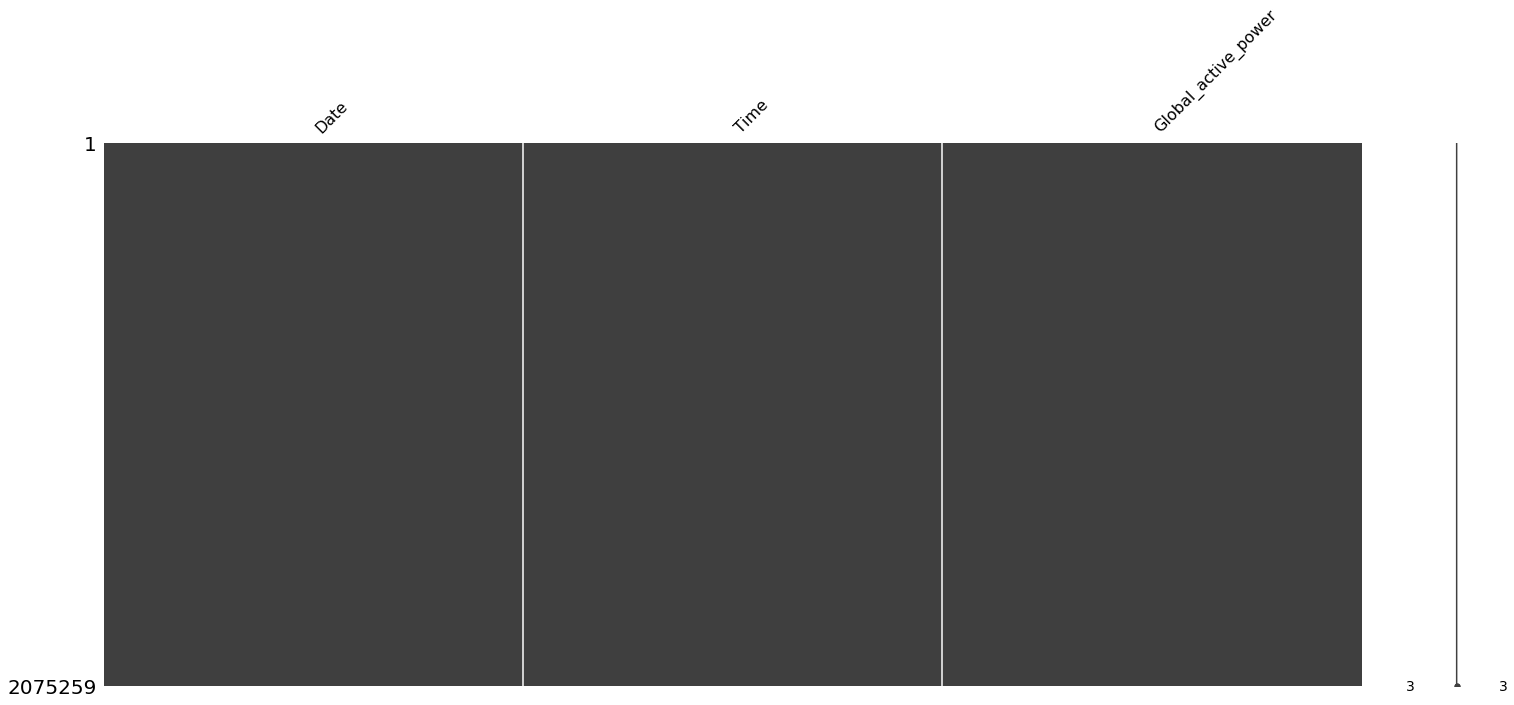

In [18]:
import missingno as msno
msno.matrix(df_uci)

Na célula abaixo, vou fazer uma tranformação de date para datetime, isso vai facilitar nossas análises. Trabalhar com datatype de tempo é realmente chato :/ #Desabafo

In [19]:
plt.style.use('seaborn')

df_uci['datetime'] = pd.to_datetime(df_uci['Date'] + ' '+ df_uci['Time'])
df_uci = df_uci.drop(['Date','Time'], axis=1)
df_uci = df_uci.set_index('datetime')

In [20]:
df_uci.head()

,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [21]:
df_uci.isnull().sum()

Global_active_power    0
dtype: int64

Ainda temos o problema de algumas células estarem com valor nulo. Vamos limpar isso:

In [22]:
df_uci = df_uci.replace('?', np.nan)
df_uci = df_uci.astype(np.float).fillna(method='bfill')

Finalmente, vamos fazer um *resampling* de nosso dataset para entendermos, hora a hora, como é o consumo de energia dos cidadãos americanos:

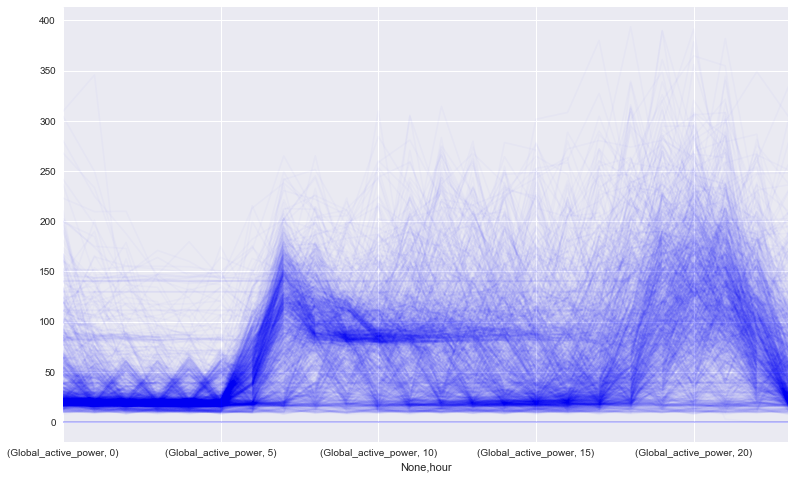

In [23]:
# For simplication,
# I will resample so that each row
# represents a whole hour
df_uci_hourly = df_uci.resample('H').sum()   # obter o consumo por hora
df_uci_hourly['hour'] = df_uci_hourly.index.hour
df_uci_hourly.index = df_uci_hourly.index.date

df_uci_pivot = df_uci_hourly.pivot(columns='hour')
df_uci_pivot = df_uci_pivot.dropna()

df_uci_pivot.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.02)

Precisamos nos lembrar que K-Means é um algoritmo que calcula distâncias. Para quase todo algoritmo que calcula distâncias, vamos ter que usar um scaling para padronizar a escala de features que temos. Portanto, na célula abaixo, aplique o MinMaxScaler cuja documentação se encontra __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)__

In [24]:
X = df_uci_pivot.values.copy() #use X

In [25]:
# %load solutions/solution_04.py

from sklearn.preprocessing import MinMaxScaler
 
# Very important to scale!
sc = MinMaxScaler()
X = sc.fit_transform(X)

Legal, agora que transformamos nossos dados, podemos usar algum método para descobrir o melhor número de clusters. Já vimos o método de cotovelo, mas dessa vez utilizaremos o `silhouette_score`, que é uma métrica built-in, de -1 a 1, que nos diz quão semelhante um ponto é em relação a seu cluster em comparação aos outros clusters.

In [27]:
from sklearn.metrics import silhouette_score   ## variância ideal é aquela mais perto de 1, por isso queremos o maior silhouette score

sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

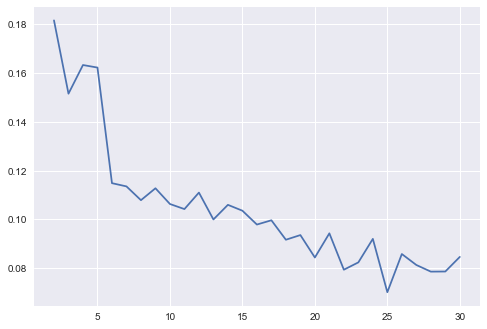

In [28]:
plt.plot(n_cluster_list,sillhoute_scores) # o melhor silhouette score é o 2 - separando em dois clusters (frio e calor)

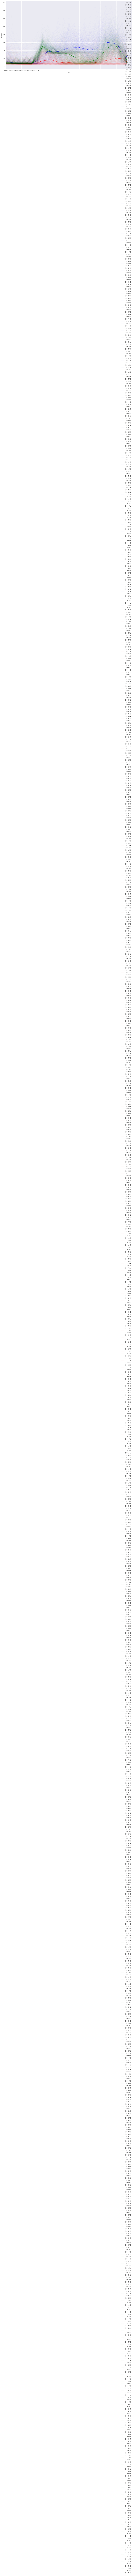

In [29]:
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, name='cluster')
df_uci_pivot = df_uci_pivot.set_index(cluster_found_sr, append=True )

fig, ax= plt.subplots(1,1, figsize=(18,10))
color_list = ['blue','red','green']
cluster_values = sorted(df_uci_pivot.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    df_uci_pivot.xs(cluster, level=1).T.plot(
        ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {cluster}'
        )
    df_uci_pivot.xs(cluster, level=1).median().plot(
        ax=ax, color=color, alpha=0.9, ls='--'
    )

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.legend()

Finalmente, vamos usar um plotting com data compression para visualizar os resultados:

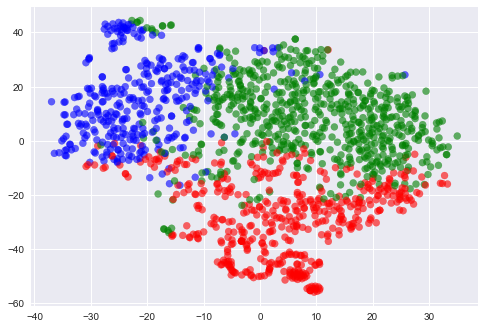

In [30]:
from sklearn.manifold import TSNE
import matplotlib.colors

tsne = TSNE()
results_tsne = tsne.fit_transform(X)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)

plt.scatter(results_tsne[:,0], results_tsne[:,1],
    c=df_uci_pivot.index.get_level_values('cluster'),
    cmap=cmap, 
    alpha=0.6, 
    )

Para o arquivo original [clique aqui](http://lucianogviola.com/data/energy_clustering/)